In [16]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_palette('bright')

In [2]:
data = pd.read_csv(r'C:\Users\hp\Desktop\New folder\machine-learning-notes\data\loan_data.csv')
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
data.shape

(45000, 14)

In [4]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
# split the X and y 

X = data.drop(columns=['loan_status'])
y = data['loan_status']

column_names = list(X.columns)

In [9]:
# encode the categorical variables 
cat_cols = list(X.select_dtypes(include="object").columns)

label_encoders = {}

for col in cat_cols:
    encoder = LabelEncoder()
    encoder.fit(X[col])
    X[col] = encoder.transform(X[col])
    label_encoders[col] = encoder

X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0


In [11]:
# split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,
                                                    random_state=23)

In [12]:
# scale the Xs

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Train the model

In [13]:
model = LogisticRegression() # init the model
model.fit(X_train, y_train) # fit the model to the data
train_preds = model.predict(X_train) # get train prediction
test_preds = model.predict(X_test) # get test prediction

### Model Evaluation

In [14]:
# accuracy score

train_accuracy = accuracy_score(y_true=y_train, y_pred= train_preds)
print(f'train accuracy: {train_accuracy}')
test_accuracy = accuracy_score(y_true=y_test, y_pred= test_preds)
print(f'test accuracy: {test_accuracy}')

train accuracy: 0.8918611111111111
test accuracy: 0.888


### confusion matrix

Text(0.5, 1.0, 'test confusion matrix')

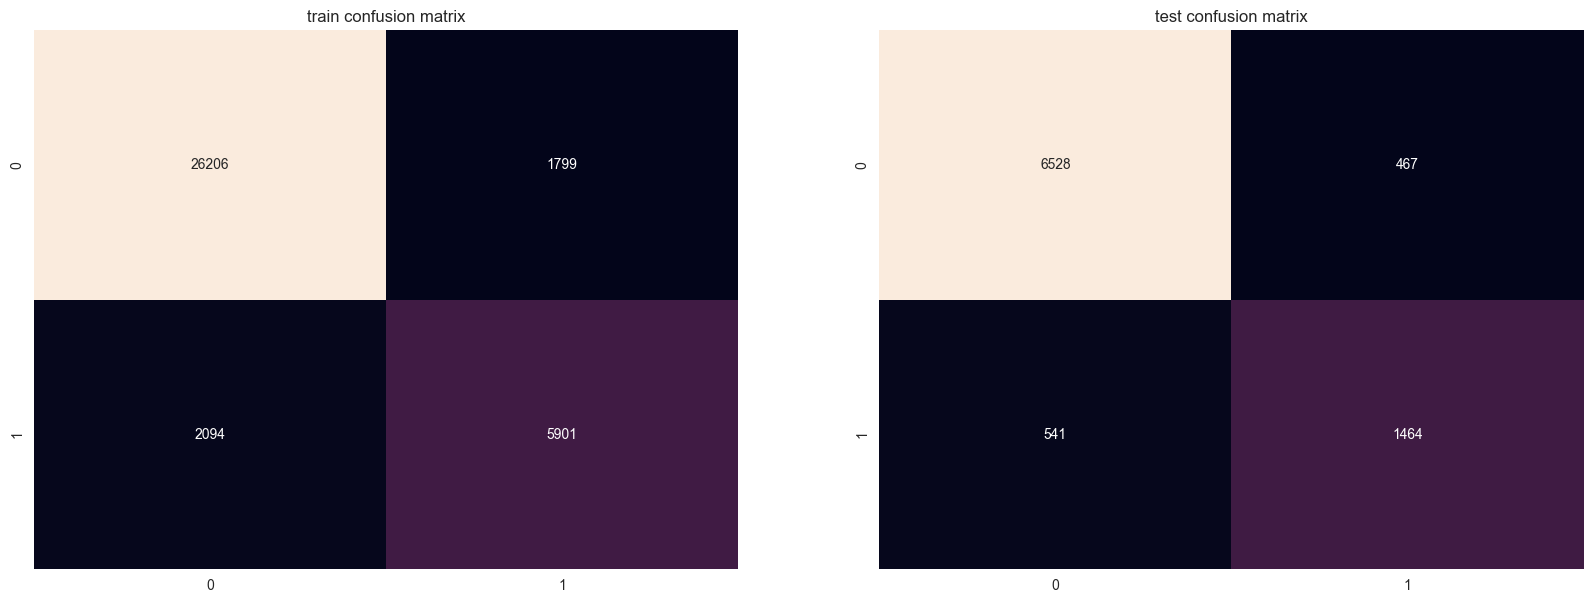

In [20]:
train_confusion = confusion_matrix(y_train, train_preds)
test_confusion = confusion_matrix(y_test, test_preds)

fig, axes = plt.subplots(1, 2, figsize = (20, 7))
sns.heatmap(data= train_confusion, ax = axes[0], cbar=False,
            annot= True, fmt='d')
sns.heatmap(data= test_confusion, ax = axes[1], cbar=False,
            annot= True, fmt='d')

axes[0].set_title("train confusion matrix")
axes[1].set_title("test confusion matrix")


In [25]:
print(f'Train precision for class 1: {precision_score(y_train, train_preds)}')
print(f'Train precision for class 0: {precision_score(y_train, train_preds, pos_label=0)}')

print(f'Train recall for class 1: {recall_score(y_train, train_preds)}')
print(f'Train recall for class 0: {recall_score(y_train, train_preds, pos_label=0)}')

Train precision for class 1: 0.7663636363636364
Train precision for class 0: 0.9260070671378092
Train recall for class 1: 0.7380863039399624
Train recall for class 0: 0.9357614711658633


In [26]:
print(f'test precision for class 1: {precision_score(y_test, test_preds)}')
print(f'test precision for class 0: {precision_score(y_test, test_preds, pos_label=0)}')

print(f'test recall for class 1: {recall_score(y_test, test_preds)}')
print(f'test recall for class 0: {recall_score(y_test, test_preds, pos_label=0)}')

test precision for class 1: 0.7581563956499223
test precision for class 0: 0.9234686660065072
test recall for class 1: 0.7301745635910224
test recall for class 0: 0.9332380271622588


In [27]:
print(f'test train for class 1: {f1_score(y_test, test_preds)}')
print(f'train f1 for class 0: {f1_score(y_test, test_preds, pos_label=0)}')

print(f'test f1 for class 1: {f1_score(y_test, test_preds)}')
print(f'test f1 for class 0: {f1_score(y_test, test_preds, pos_label=0)}')

test train for class 1: 0.7439024390243902
train f1 for class 0: 0.9283276450511946
test f1 for class 1: 0.7439024390243902
test f1 for class 0: 0.9283276450511946


In [30]:
# train classification report
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     28005
           1       0.77      0.74      0.75      7995

    accuracy                           0.89     36000
   macro avg       0.85      0.84      0.84     36000
weighted avg       0.89      0.89      0.89     36000



In [31]:
# test classification report
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      6995
           1       0.76      0.73      0.74      2005

    accuracy                           0.89      9000
   macro avg       0.84      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000

